In [55]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [56]:
fetch_housing_data()

In [57]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [58]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [59]:
housing.info()
# Total_bedrooms has 207 values missing!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
housing["ocean_proximity"].value_counts()
#this column has categorial values (not a number)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [61]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


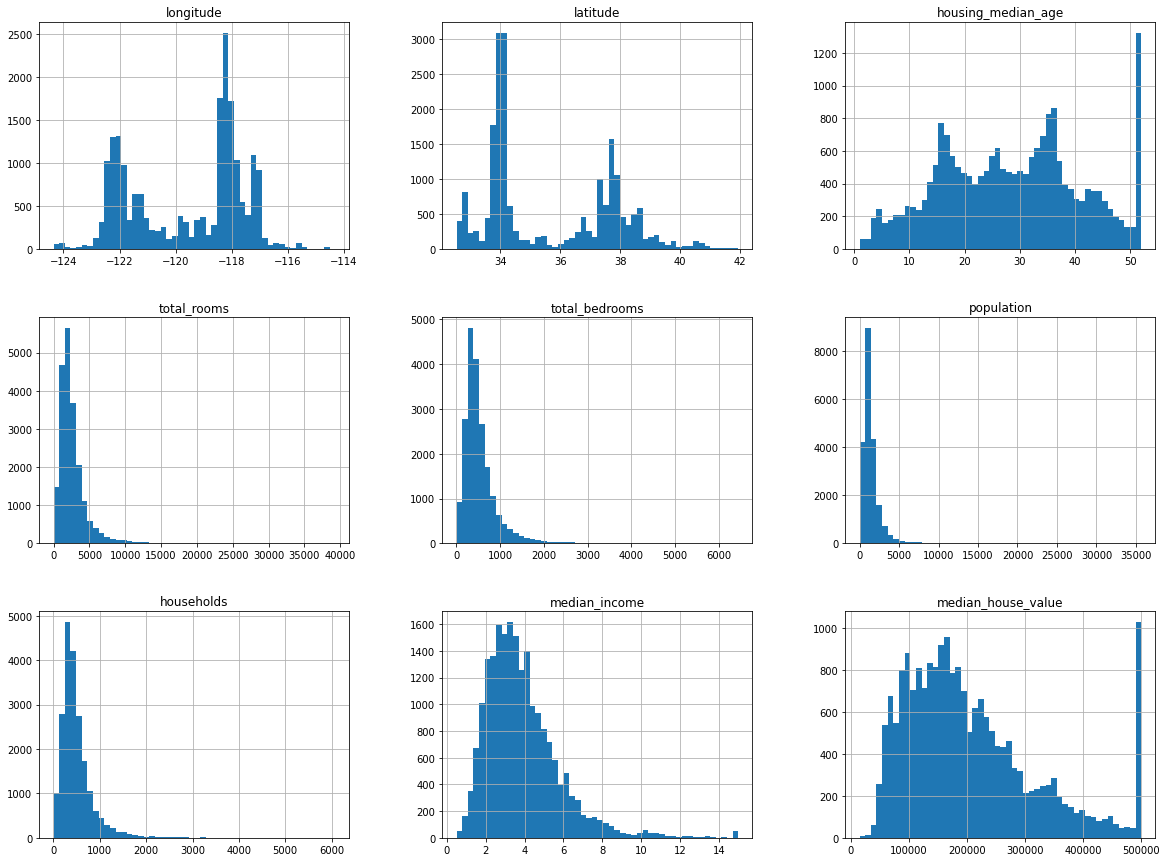

In [62]:
%matplotlib inline 
#only on jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

The housing median age and the median house value have been capped (barra gran a la dreta de l'histograma).
També cal tenir en compte que els histogrames són tail-heavy, això pot provocar que alguns ML algorithms els hi sigui mes dificil trobar patterns.

<AxesSubplot:>

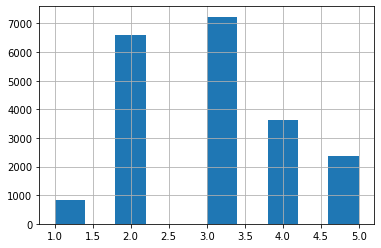

In [63]:
import numpy as np 
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6., np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [65]:
strat_train_set.drop("income_cat",1)
strat_test_set.drop("income_cat",1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


In [66]:
#put the test set aside and create a copy of the training set to make manipulations without harming the original
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

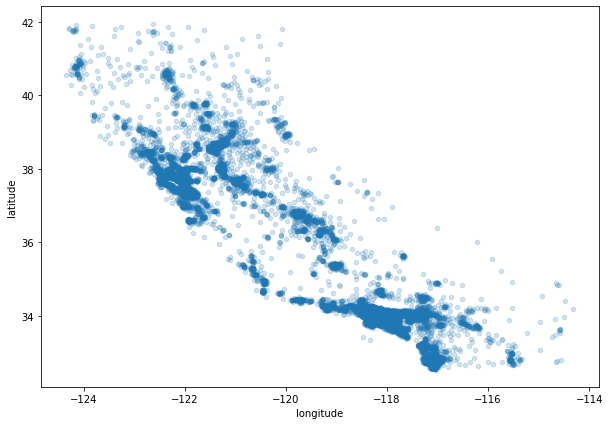

In [67]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.2, figsize=(10,7))

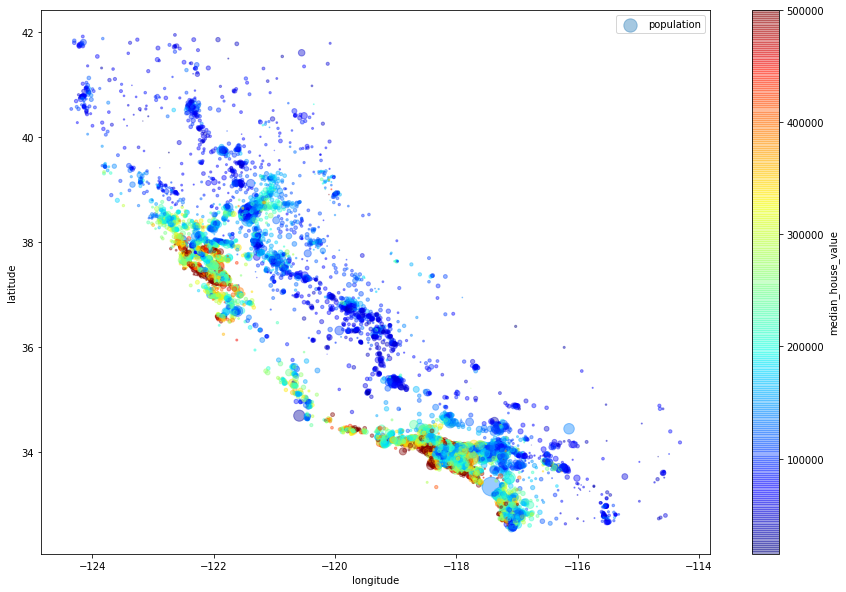

In [68]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(15,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [69]:
#standard correlation coefficient (Pearson's r)
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

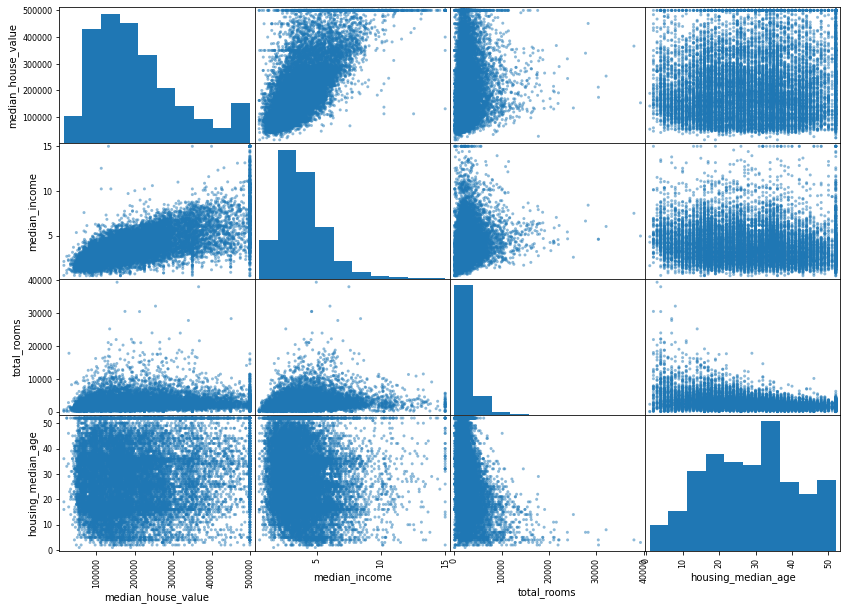

In [70]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(14,10))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

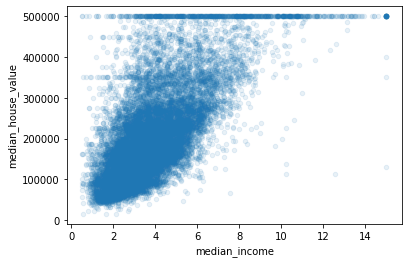

In [71]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [72]:
clean_df = housing.groupby(["median_house_value"]).count().sort_values(by="longitude", ascending=False)
# hi ha varis grups de preu molt grans, en el gràfic de sobre es poden veure linies horitzontals (500.001 que el podem tractar com +500.000)
clean_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
median_house_value,,,,,,,,,,
500001.0,786,786,786,786,781,786,786,786,786,786
137500.0,102,102,102,102,99,102,102,102,102,102
162500.0,91,91,91,91,90,91,91,91,91,91
112500.0,80,80,80,80,80,80,80,80,80,80
187500.0,76,76,76,76,75,76,76,76,76,76


In [73]:
#looking for more meaningful variables
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [74]:
corr_matrix = housing.corr() 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Preparing the data for ML algorithms
We are creating a copy of the initial training set to make sure we get a fresh start

In [75]:
#separating the predictors and the labels, we might want to apply different transformations
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Data Cleaning (Dataframe is missing values in "total_bedrooms" column). We have various options:

In [76]:
# Option 1: remove missing values
#housing.dropna(subset=["total_bedrooms"])

# Option 2: remove the whole attribute
#housign.drop("total_bedrooms", axis=1)

# Option 3: set the values to some value (zero, the mean, the median...)
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)

In [77]:
# Scikit-Learn provides handy class to take care of missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
#remove categorical values, we cannot compute their median
housing_numerical = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_numerical)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [78]:
#transform the training set by replacing missing values with the learned medians
#returns numpy array
X = imputer.transform(housing_numerical)

#creating a pandas dataframe
housing_tr = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,3.0


One-hot encoding for categorical variables
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [79]:
housing_categorical = housing[["ocean_proximity"]] #double brackets
#With one column name, single pair of brackets returns a Series, while double brackets return a dataframe
housing_categorical

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [80]:
from sklearn.preprocessing import OneHotEncoder as OHE

cat_encoder = OHE()
housing_cat_1hot = cat_encoder.fit_transform(housing_categorical)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [81]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Let's create a custom transformer to add extra attributes:


In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [83]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this:


In [84]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5,6.008850,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3,4.505810,3.047847


In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_numerical)

In [86]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [87]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_numerical)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OHE(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [88]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Training the Model

#### Linear Regression

In [89]:
#TRAINING
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

#fit(X, y, sample_weight=None)

#Parameters:
#X{array-like, sparse matrix} of shape (n_samples, n_features) --> Training data
#yarray-like of shape (n_samples,) or (n_samples, n_targets) --> Target values

LinearRegression()

In [90]:
#EVALUATION 1
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [91]:
#EVALUATION 2
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459939

(Above) Root-Mean-Square Error is 68376$ (too much --> underfitting)

#### Let's train a more powerful model: Decision Tree Regressor

In [92]:
#TRAINING
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [93]:
#EVALUATION
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

WHAT!? 0.0! Is this the perfect model

It has probably overfit the data. We need to use part of the training set for model validation (don't use the training set until you are ready to launch the model)

### Cross Validation unsing SciKit's K-fold cross-validation feature

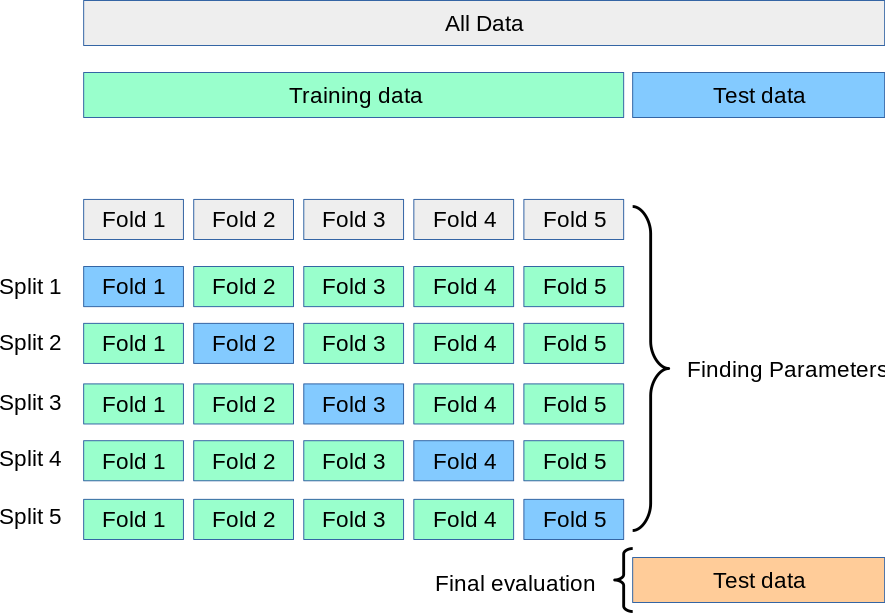

https://scikit-learn.org/stable/modules/cross_validation.html

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [95]:
def display_scores(scores):
    print("DECISION TREE MODEL")
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    
display_scores(tree_rmse_scores)

DECISION TREE MODEL
scores:  [70122.870857   65738.22140731 71035.50537003 69110.4391784
 70302.26550309 74808.78674244 71842.07034454 70540.76558879
 77641.46486296 67583.19020005]
mean:  70872.55800546095
Standard deviation:  3218.109210768469


In [96]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("LINEAR REGRESSION Model")
display_scores(lin_rmse_scores)

LINEAR REGRESSION Model
DECISION TREE MODEL
scores:  [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
mean:  68828.99948449328
Standard deviation:  2662.761570610338


#### The decision tree model is overfitting so badly that it performs worst thant he Linear regression model
We are going to try a Random Forest Model

**Wikipedia**
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance
_____


https://www.keboola.com/blog/random-forest-regression
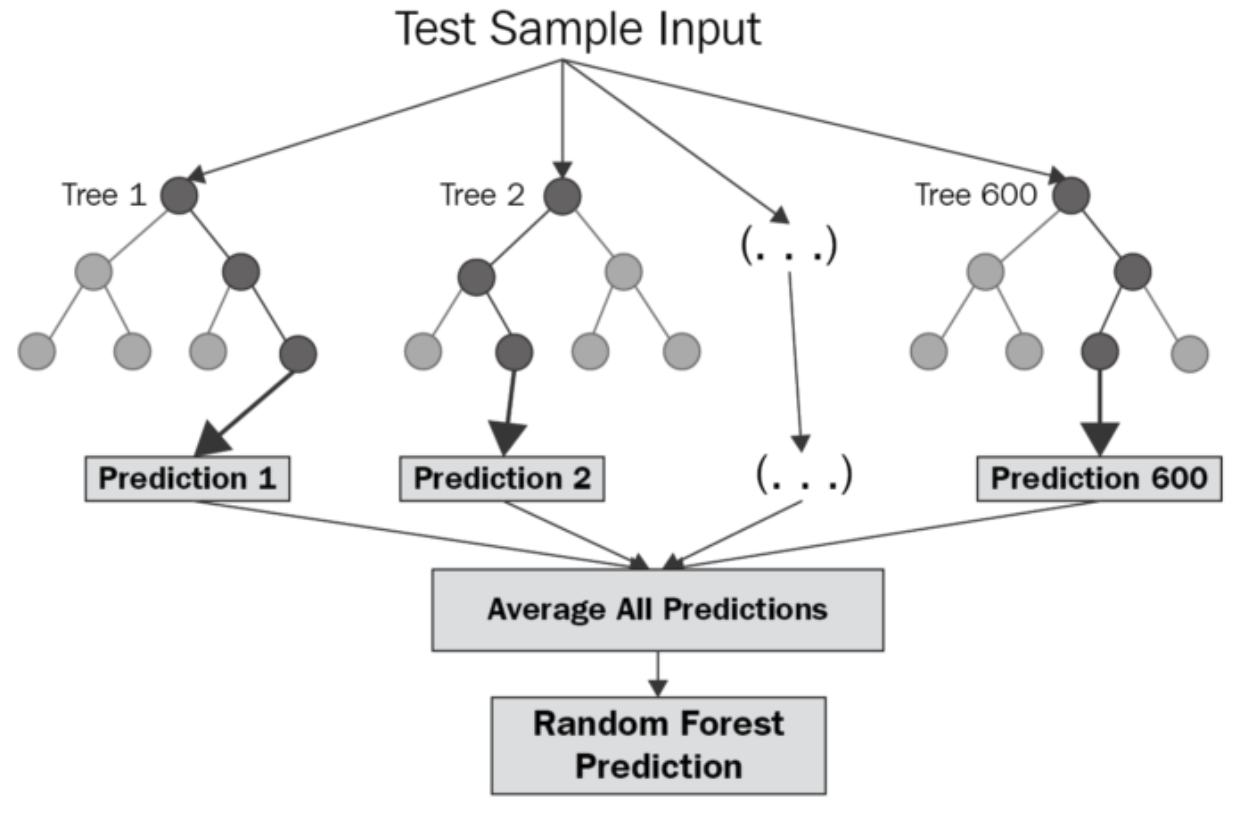

In [97]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [98]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18626.45217719628

In [99]:
%%time
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

DECISION TREE MODEL
scores:  [49633.454487   47565.18736589 50034.52343496 52444.25008076
 49463.18392461 53515.10766804 48577.59023701 47678.90315126
 53433.75372939 49947.64462367]
mean:  50229.359870258486
Standard deviation:  2082.3174179664184
CPU times: user 2min 10s, sys: 544 ms, total: 2min 10s
Wall time: 2min 10s


## Fine-Tune Your Model
### Using Grid Search

In [100]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators":[3,10,30], "max_features":[2,4,6,8]},
    {"bootstrap":[False], "n_estimators":[3,10], "max_features":[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

CPU times: user 46.3 s, sys: 31.9 ms, total: 46.3 s
Wall time: 46.3 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [101]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [102]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [103]:
df = pd.DataFrame(grid_search.cv_results_)

df = df[["mean_test_score", "param_max_features", "param_n_estimators", "params"]]
df["mean_test_score"]=np.sqrt(-df["mean_test_score"])
df.sort_values(by="mean_test_score")

,mean_test_score,param_max_features,param_n_estimators,params
11,50946.387078,8,30,"{'max_features': 8, 'n_estimators': 30}"
8,50980.514842,6,30,"{'max_features': 6, 'n_estimators': 30}"
5,51466.477847,4,30,"{'max_features': 4, 'n_estimators': 30}"
7,52731.174225,6,10,"{'max_features': 6, 'n_estimators': 10}"
17,52829.647254,4,10,"{'bootstrap': False, 'max_features': 4, 'n_est..."
15,53313.337089,3,10,"{'bootstrap': False, 'max_features': 3, 'n_est..."
10,53350.255458,8,10,"{'max_features': 8, 'n_estimators': 10}"
2,53509.720860,2,30,"{'max_features': 2, 'n_estimators': 30}"
4,53977.712323,4,10,"{'max_features': 4, 'n_estimators': 10}"
13,55484.940114,2,10,"{'bootstrap': False, 'max_features': 2, 'n_est..."


### Randomized Search

In [104]:
%%time
from sklearn.model_selection import RandomizedSearchCV


param_grid = [{"n_estimators":[10,30,50,100], "max_features":[2,4,6,8], "bootstrap":[True, False]}]

forest_reg = RandomForestRegressor()

rs = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                        scoring="neg_mean_squared_error", return_train_score=True, 
                        n_iter=32)

rs.fit(housing_prepared, housing_labels)

CPU times: user 6min 45s, sys: 1.04 s, total: 6min 46s
Wall time: 6min 46s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=32,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_features': [2, 4, 6, 8],
                                         'n_estimators': [10, 30, 50, 100]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [105]:
rs.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6)

In [106]:
df = pd.DataFrame(rs.cv_results_)

df = df[["mean_test_score", "param_max_features", "param_n_estimators", "params"]]
df["mean_test_score"]=np.sqrt(-df["mean_test_score"])
df.sort_values(by="mean_test_score")

,mean_test_score,param_max_features,param_n_estimators,params
27,49298.647366,6,100,"{'n_estimators': 100, 'max_features': 6, 'boot..."
31,49390.041517,8,100,"{'n_estimators': 100, 'max_features': 8, 'boot..."
26,49639.433863,6,50,"{'n_estimators': 50, 'max_features': 6, 'boots..."
30,49711.758529,8,50,"{'n_estimators': 50, 'max_features': 8, 'boots..."
23,49867.491882,4,100,"{'n_estimators': 100, 'max_features': 4, 'boot..."
29,49875.520222,8,30,"{'n_estimators': 30, 'max_features': 8, 'boots..."
15,49949.023539,8,100,"{'n_estimators': 100, 'max_features': 8, 'boot..."
25,50108.730185,6,30,"{'n_estimators': 30, 'max_features': 6, 'boots..."
22,50123.589139,4,50,"{'n_estimators': 50, 'max_features': 4, 'boots..."
11,50157.662372,6,100,"{'n_estimators': 100, 'max_features': 6, 'boot..."


## Evaluate the system on the test set

In [107]:
final_model = rs.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [108]:
final_rmse

47225.101398204075

### Confidence Interval for generalization error
The confidence interval is the range of values that you expect your estimate to fall between a certain percentage of the time if you run your experiment again or re-sample the population in the same way.

In [109]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, 
                         loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45230.494749  , 49138.81102451])

# Support Vector Machine Regressor (SVR)
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

## Explicació: 
https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

### Try:
kernel = "lineal" (with various values for **C** hyperparameter)
and
kernel = "rbf" (with various values for **C** and **gamma** hyperparameters) 

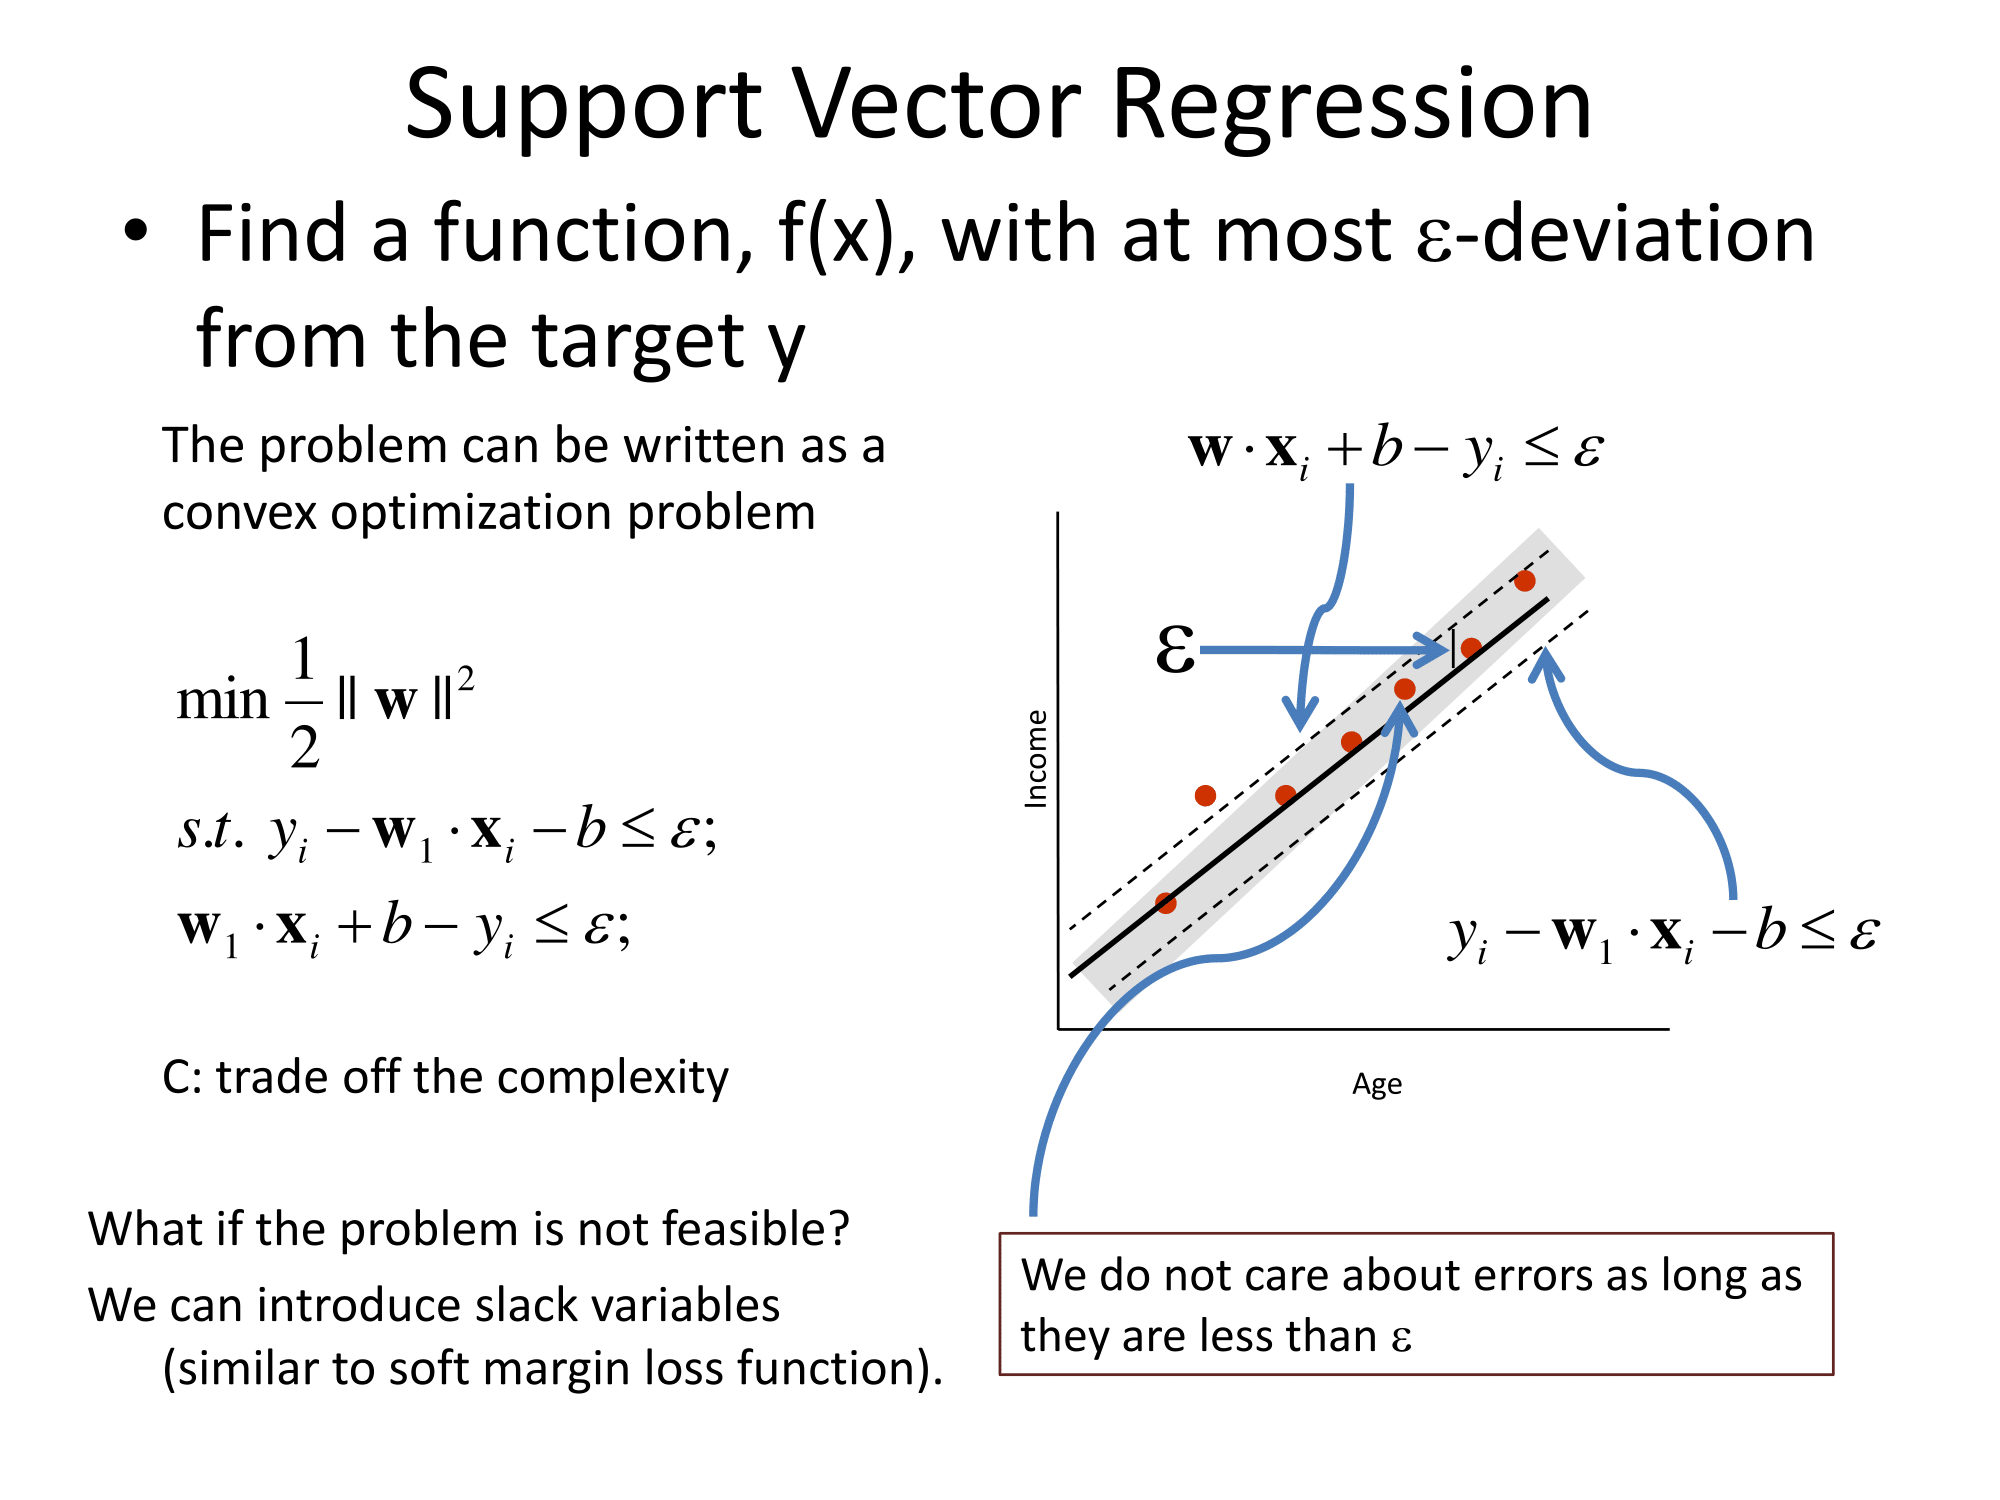

In [48]:
%%time
""""
from sklearn.model_selection import RandomizedSearchCV


param_grid = [{"n_estimators":[10,30,50,100], "max_features":[2,4,6,8], "bootstrap":[True, False]}]

forest_reg = RandomForestRegressor()

rs = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                        scoring="neg_mean_squared_error", return_train_score=True, 
                        n_iter=32)

rs.fit(housing_prepared, housing_labels)
"""
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [{"kernel":["linear"], "C": [0.1,1,10,100]},
             {"kernel":["rbf"], "C":[0.1,1,10,100], "gamma":[1,10]}]

svr = GridSearchCV(SVR(),param_grid,refit=True)
svr.fit(housing_prepared, housing_labels)



CPU times: user 10min 28s, sys: 5.63 s, total: 10min 33s
Wall time: 10min 34s


GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [1, 10],
                          'kernel': ['rbf']}])

In [110]:
final_model = svr.best_estimator_

predicting the labels from X_test_prepared

In [118]:
final_predictions = final_model.predict(X_test_prepared)

In [121]:
import numpy as np


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mean_perc = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mean_perc

mean_absolute_percentage_error(y_test, final_predictions)
#26,2% d'error amb aquest model!

26.212253922703532